In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
X = df.iloc[:,:-1]

In [8]:
distortions = []
clusters = range(1,11)
n = len(X)

for k in clusters:
    model = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / n)

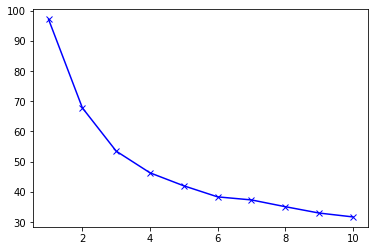

In [11]:
plt.plot(clusters, distortions, 'bx-')
plt.show()

In [18]:
dbscan = DBSCAN(eps=20, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=20, min_samples=6)

In [19]:
y_pred = dbscan.labels_

In [20]:
np.unique(y_pred, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([244, 308, 194,  22], dtype=int64))